**Linear Data**


In [37]:
import pandas as pd
import numpy as np
from hierarchicalcausalmodels.models.HSCM.HSCM import HSCM # type: ignore
import matplotlib.pyplot as plt
from scipy.stats import norm, expon



In [38]:
import json
import os

# Function to save sampled data to a JSON file
def save_sampled_data(data, filename):
    # Delete existing file if it exists
    if os.path.exists(filename):
        os.remove(filename)
    
    # Write new data to file
    with open(filename, 'w') as f:
        json.dump(data, f, indent=4)


In [39]:
# Define the HSCM model structure
nodes = ["a", "b", "c", "d", "e"]
edges = [("a", "b"), ('a', 'c'), ("b", "c"), ("c", "d"), ("b", "d"), ("d", "e"),("c", "e")]
unit_nodes = ["a", "c", "e"]
subunit_nodes = ["d", "b"]
sizes = [150] * 150# You can adjust this based on your data

# Initialize the HSCM model
hscm = HSCM(nodes, edges, unit_nodes, subunit_nodes, sizes, node_functions={}, data=None)

# Define random functions for each node
random_functions = {
    "a": lambda x: norm.ppf(x, 0, 1),
    "b": lambda x: norm.ppf(x, 0, 1),
    "c": lambda x: norm.ppf(x, 0, 1),
    "d": lambda x: norm.ppf(x, 0, 1),
    "e": lambda x: norm.ppf(x, 0, 1)
}

# Define additive functions for each node
additive_functions = {
    "a": {},
    
    "b": {"a": lambda a: a},
    
    "c": {"a": lambda a: a**3, "b": lambda b: (np.mean(np.array(list(b))) +1)**2},
    
    "d": {"b": lambda b: b +1, "c": lambda c: -c},
    
    "e": {"d": lambda d: np.mean(np.array(list(d))) +1, "c": lambda c : np.sqrt(abs(c))}
}


In [40]:

# Set up the HSCM model
hscm.additive_model(additive_functions, random_functions)


In [41]:
sampled_data = hscm.sample_data_after_intervention('_b', lambda x: norm.ppf(x, 0, 1))

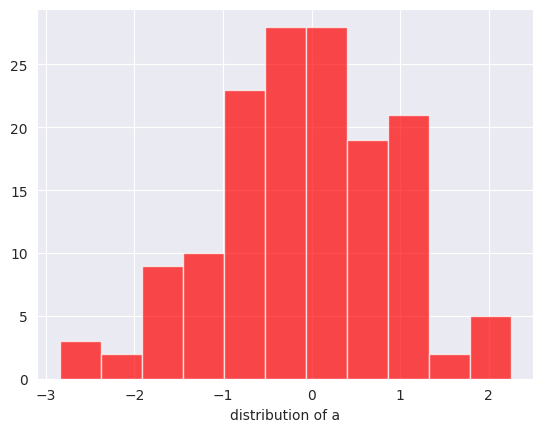

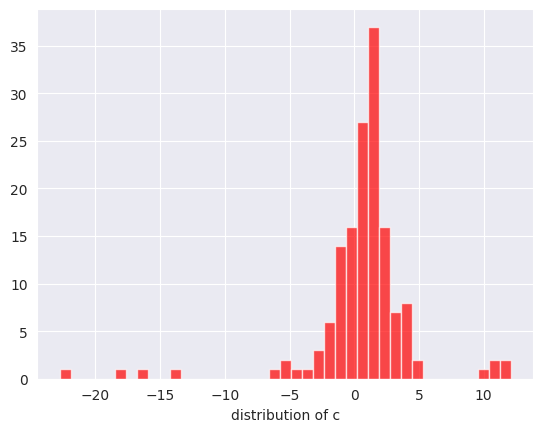

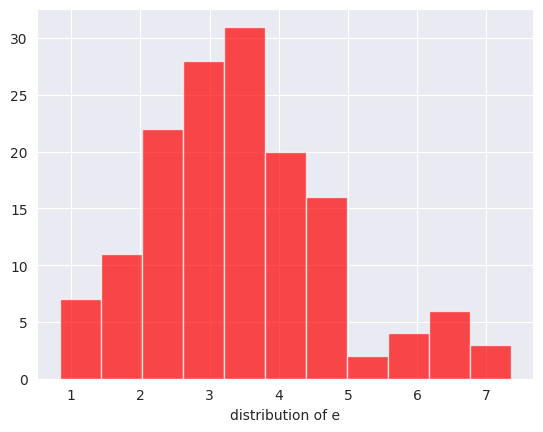

[[-1.656610479793739,
  -0.6505168920881623,
  0.5564666338948309,
  1.1026653213870707,
  0.08938475401661189,
  -0.8715227580707963,
  -0.12065413977804985,
  -1.2232642903856323,
  1.297052161195028,
  -0.12826903814106244,
  0.06662360774610773,
  0.6003963671231797,
  -0.903957719966884,
  1.433747920285621,
  0.7660737486692006,
  -0.2723519557429959,
  -0.7469242207178268,
  -0.05220081020985714,
  -0.04290334229306542,
  1.118927274077313,
  -1.4281710430369434,
  -0.21697941981690483,
  -1.3099464087348385,
  -0.6580829757771522,
  0.6553260037486536,
  -2.004289655880784,
  0.6021756901565828,
  0.16750860387827235,
  -0.0769183122310576,
  -0.19590791601124738,
  0.5335396579337474,
  1.1251576444864009,
  0.5053558537851301,
  -0.66926223272359,
  2.074326377810769,
  0.18496821698383822,
  1.249566668885741,
  0.20524939676053786,
  -0.28303443638862796,
  1.1381962025120258,
  0.741224605558015,
  2.1684860763348515,
  -0.6443729417674828,
  -0.07449543790591828,
  -0.009

In [42]:

hscm.plot_data()

In [43]:

save_sampled_data(sampled_data, 'data/sampled_data.json')

In [44]:

# Set distributions from the loaded data
hscm.set_distribution_from_data()


In [45]:
# Perform additional analysis or modify the model as needed
# For example, you can change the graph structure or random functions here

# Re-sample data after modifications
new_sampled_data = hscm.resample_data_after_intervention()


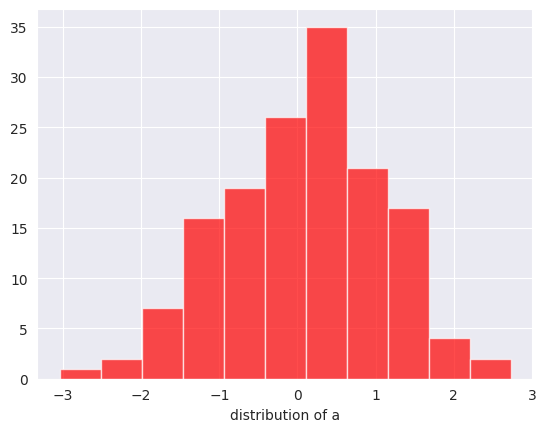

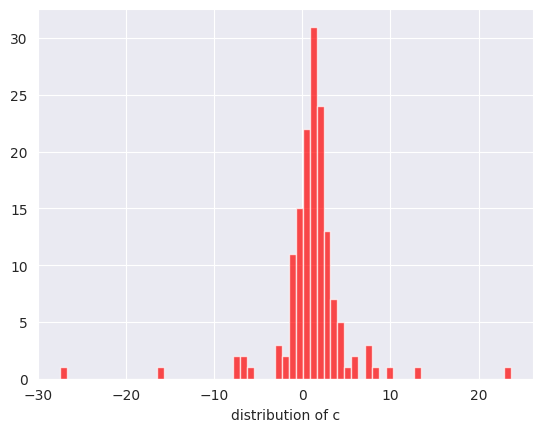

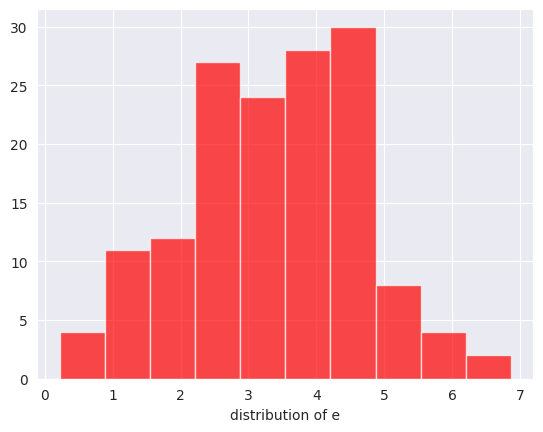

[[-1.656610479793739,
  -0.6505168920881623,
  0.5564666338948309,
  1.1026653213870707,
  0.08938475401661189,
  -0.8715227580707963,
  -0.12065413977804985,
  -1.2232642903856323,
  1.297052161195028,
  -0.12826903814106244,
  0.06662360774610773,
  0.6003963671231797,
  -0.903957719966884,
  1.433747920285621,
  0.7660737486692006,
  -0.2723519557429959,
  -0.7469242207178268,
  -0.05220081020985714,
  -0.04290334229306542,
  1.118927274077313,
  -1.4281710430369434,
  -0.21697941981690483,
  -1.3099464087348385,
  -0.6580829757771522,
  0.6553260037486536,
  -2.004289655880784,
  0.6021756901565828,
  0.16750860387827235,
  -0.0769183122310576,
  -0.19590791601124738,
  0.5335396579337474,
  1.1251576444864009,
  0.5053558537851301,
  -0.66926223272359,
  2.074326377810769,
  0.18496821698383822,
  1.249566668885741,
  0.20524939676053786,
  -0.28303443638862796,
  1.1381962025120258,
  0.741224605558015,
  2.1684860763348515,
  -0.6443729417674828,
  -0.07449543790591828,
  -0.009

In [46]:

hscm.plot_data_resampled()

In [47]:
print(new_sampled_data)

{'a0': -0.9433150727026735, 'a1': 1.1091962156796524, 'a2': 0.9407930246548274, 'a3': 1.5981344350175246, 'a4': -0.8265357307635518, 'a5': 0.9388015761398766, 'a6': 0.21590155595901359, 'a7': 0.5757922824179521, 'a8': -0.5888697117232699, 'a9': 0.3703051010368857, 'a10': 1.4580437943581293, 'a11': 1.711159189008215, 'a12': 0.022065943762737853, 'a13': 0.6099210243074111, 'a14': 0.6031060380511208, 'a15': -0.6891601799180704, 'a16': 1.0236439793488767, 'a17': -0.2472178946983368, 'a18': -0.30181352750375556, 'a19': 0.40445722677811097, 'a20': -0.320296889540814, 'a21': -2.014853184682472, 'a22': -1.0988270086148042, 'a23': 0.661762296136088, 'a24': -0.036962119000613886, 'a25': -1.5274211442876093, 'a26': -0.37448335159183027, 'a27': -0.06428332745995685, 'a28': 1.4617541811512738, 'a29': 1.6685191656644742, 'a30': -3.03967373732635, 'a31': -1.2738131825353134, 'a32': -0.7745002428835259, 'a33': 1.1607431377637192, 'a34': -0.9469888675655477, 'a35': 0.07194143926759064, 'a36': 1.2172701

In [48]:
save_sampled_data(new_sampled_data, 'data/resampled_data.json')

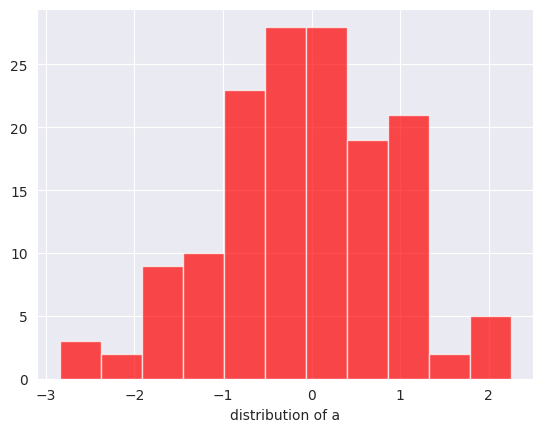

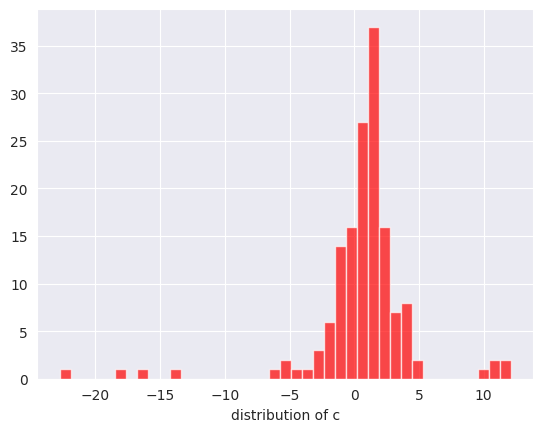

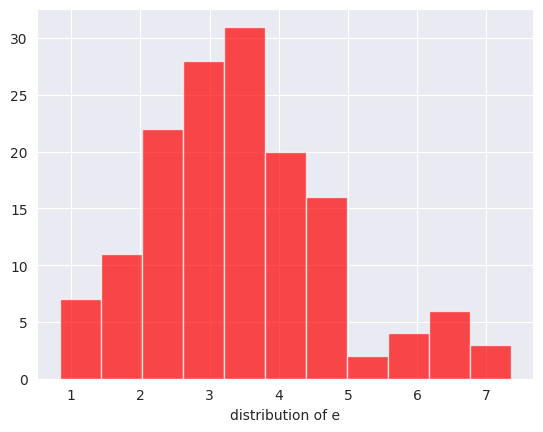

[[-1.656610479793739,
  -0.6505168920881623,
  0.5564666338948309,
  1.1026653213870707,
  0.08938475401661189,
  -0.8715227580707963,
  -0.12065413977804985,
  -1.2232642903856323,
  1.297052161195028,
  -0.12826903814106244,
  0.06662360774610773,
  0.6003963671231797,
  -0.903957719966884,
  1.433747920285621,
  0.7660737486692006,
  -0.2723519557429959,
  -0.7469242207178268,
  -0.05220081020985714,
  -0.04290334229306542,
  1.118927274077313,
  -1.4281710430369434,
  -0.21697941981690483,
  -1.3099464087348385,
  -0.6580829757771522,
  0.6553260037486536,
  -2.004289655880784,
  0.6021756901565828,
  0.16750860387827235,
  -0.0769183122310576,
  -0.19590791601124738,
  0.5335396579337474,
  1.1251576444864009,
  0.5053558537851301,
  -0.66926223272359,
  2.074326377810769,
  0.18496821698383822,
  1.249566668885741,
  0.20524939676053786,
  -0.28303443638862796,
  1.1381962025120258,
  0.741224605558015,
  2.1684860763348515,
  -0.6443729417674828,
  -0.07449543790591828,
  -0.009

In [49]:


# Plot the new sampled data
hscm.plot_data()


/tmp/ipykernel_99599/3294719767.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=premier_b, shade=True)


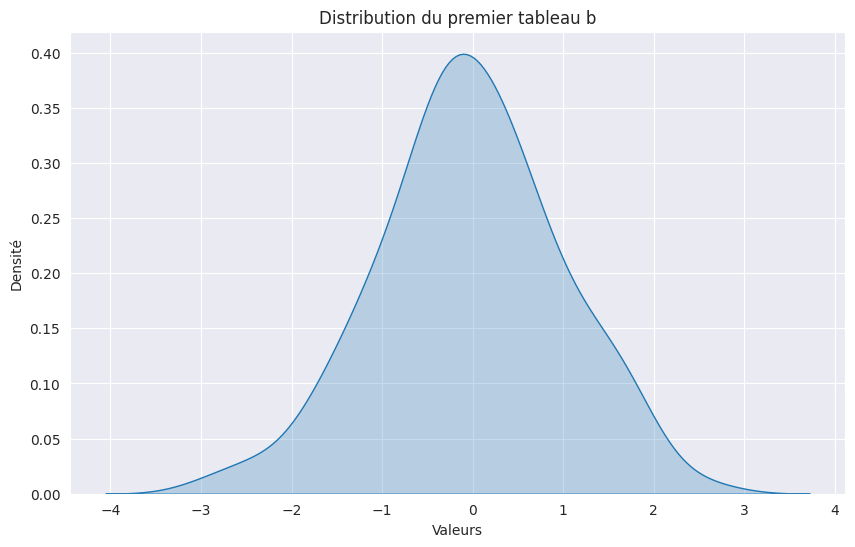

In [50]:
# Importation des bibliothèques nécessaires
import seaborn as sns
import matplotlib.pyplot as plt

# Extraction du premier tableau b
premier_b = [sampled_data[f"_b3_{i}"] for i in range(len(sizes))]

# Création de la figure
plt.figure(figsize=(10, 6))

# Tracé de la distribution avec KDE (Kernel Density Estimation) en utilisant Seaborn
sns.kdeplot(data=premier_b, shade=True)

# Personnalisation du graphique
plt.title("Distribution du premier tableau b")
plt.xlabel("Valeurs")
plt.ylabel("Densité")

# Affichage du graphique
plt.show()


In [51]:
print(sampled_data['a3'])

1.1026653213870707


KL Divergence

In [52]:
import tqdm

In [53]:
from scipy.stats import gaussian_kde # type: ignore


In [54]:
def kl_divergence(p, q, bandwidth='scott'):
    """
    Calcule la divergence KL entre deux distributions empiriques représentées par des tableaux,
    en utilisant l'estimation de densité par noyau.
    
    :param p: Premier tableau de données
    :param q: Second tableau de données
    :param bandwidth: Méthode pour estimer la largeur de bande ('scott', 'silverman' ou un nombre)
    :return: Valeur de la divergence KL
    """
    # Assurez-vous que les tableaux ont la même taille
    min_len = min(len(p), len(q))
    p = p[:min_len]
    q = q[:min_len]
    
    # Estimation de densité par noyau
    kde_p = gaussian_kde(p, bw_method=bandwidth)
    kde_q = gaussian_kde(q, bw_method=bandwidth)
    
    # Créez un espace d'échantillonnage
    x = np.linspace(min(np.min(p), np.min(q)), max(np.max(p), np.max(q)), 10000)
    
    # Estimez les densités
    p_density = kde_p(x)
    q_density = kde_q(x)
    
    # Ajoutez un petit epsilon pour éviter la division par zéro
    epsilon = 1e-10
    p_density += epsilon
    q_density += epsilon
    
    # Normalisez les densités
    p_density /= np.sum(p_density)
    q_density /= np.sum(q_density)
    
    # Calculez la divergence KL
    return np.sum(p_density * np.log(p_density / q_density))

In [55]:
def kl_div_deprecated(original, resampled):
    # Calculate histograms
    hist_original, _ = np.histogram(original, bins=50, density=True)
    hist_resampled, _ = np.histogram(resampled, bins=50, density=True)
        
        # Add small constant to avoid division by zero
    hist_original += 1e-10
    hist_resampled += 1e-10
        
        # Normalize
    hist_original /= hist_original.sum()
    hist_resampled /= hist_resampled.sum()
        
        # Calculate KL divergence
    kl_divs = np.sum(hist_original * np.log(hist_original / hist_resampled))
    
    return kl_divs

In [56]:

def run_experiment(k):
    results = []
    for i in tqdm.tqdm(range(k)):
        # Define the HSCM model structure
        nodes = ["a", "b", "c", "d", "e"]
        edges = [("a", "b"), ('a', 'c'), ("b", "c"), ("c", "d"), ("b", "d"), ("d", "e"),("c", "e")]
        unit_nodes = ["a", "c", "e"]
        subunit_nodes = ["d", "b"]
        sizes = [150] * 150# You can adjust this based on your data
        
        # Initialize the HSCM model
        hscm = HSCM(nodes, edges, unit_nodes, subunit_nodes, sizes, node_functions={}, data=None)
        
        # Define random functions for each node
        random_functions = {
            "a": lambda x: norm.ppf(x, 0, 1),
            "b": lambda x: norm.ppf(x, 0, 1),
            "c": lambda x: norm.ppf(x, 0, 1),
            "d": lambda x: norm.ppf(x, 0, 1),
            "e": lambda x: norm.ppf(x, 0, 1)
        }
        # Define additive functions for each node
        additive_functions = {
            "a": {},
            
            "b": {"a": lambda a: a},
            
            "c": {"a": lambda a: a**3, "b": lambda b: (np.mean(np.array(list(b))) +1)**2},
            
            "d": {"b": lambda b: b +1, "c": lambda c: -c},
            
            "e": {"d": lambda d: np.mean(np.array(list(d))) +1, "c": lambda c : np.sqrt(abs(c))}
        }
    
        # Set up the HSCM model
        hscm.additive_model(additive_functions, random_functions)
    
        # Sample data from the model
        sampled_data = hscm.sample_data_after_intervention('_b', lambda x: norm.ppf(x, 0, 1))
        save_sampled_data(sampled_data, f'data/sampled_data_{i}.json') # it's different !
        # Set distributions from the sampled data
        hscm.set_distribution_from_data()
    
        # Resample data
        resampled_data = hscm.resample_data_after_intervention()
        save_sampled_data(resampled_data, f'data/resampled_data_{i}.json')
        
        kl_divergences = {}
        for node in unit_nodes:
            original = [sampled_data[f"{node}{i}"] for i in range(len(sizes))]
            resampled = [resampled_data[f"{node}{i}"] for i in range(len(sizes))]
            
            kl_divergences[node] = kl_divergence(original, resampled)
        
        results.append(kl_divergences)
        
    return results

In [74]:

# Run the experiment 100 times
results = run_experiment(100)


100%|██████████| 100/100 [17:47<00:00, 10.67s/it]


if resampled, should be 0, else should be a certain value

In [75]:
print(results)

[{'a': 0.05100387334640955, 'c': 0.3307201919343009, 'e': 0.0415617399356046}, {'a': 0.07726768369953174, 'c': 0.29848766402613236, 'e': 0.0603588835879184}, {'a': 0.019872074633072462, 'c': 0.08033422470797297, 'e': 0.032245799366156326}, {'a': 0.008614828536832781, 'c': 0.09626061105596206, 'e': 0.019926498934767715}, {'a': 0.010762362725498692, 'c': 0.12292131877593594, 'e': 0.016920356560586196}, {'a': 0.01969260435472403, 'c': 0.059318719093225294, 'e': 0.023118245991268396}, {'a': 0.0201078320160247, 'c': 0.04915171694017855, 'e': 0.017886805411333046}, {'a': 0.020979419091778508, 'c': 0.03140287475817187, 'e': 0.05747718764556345}, {'a': 0.006394384433489279, 'c': 0.1446457996755847, 'e': 0.017847547273387117}, {'a': 0.019357666619833368, 'c': 0.20128819761632, 'e': 0.10244051140095532}, {'a': 0.01749768670306663, 'c': 0.035368863095712744, 'e': 0.03470528400856601}, {'a': 0.025938957366035777, 'c': 0.08427938829024671, 'e': 0.02915926628000046}, {'a': 0.005604569687141479, 'c':

/tmp/ipykernel_99599/1790404846.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='KL Divergence', hue='Node', shade=True)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


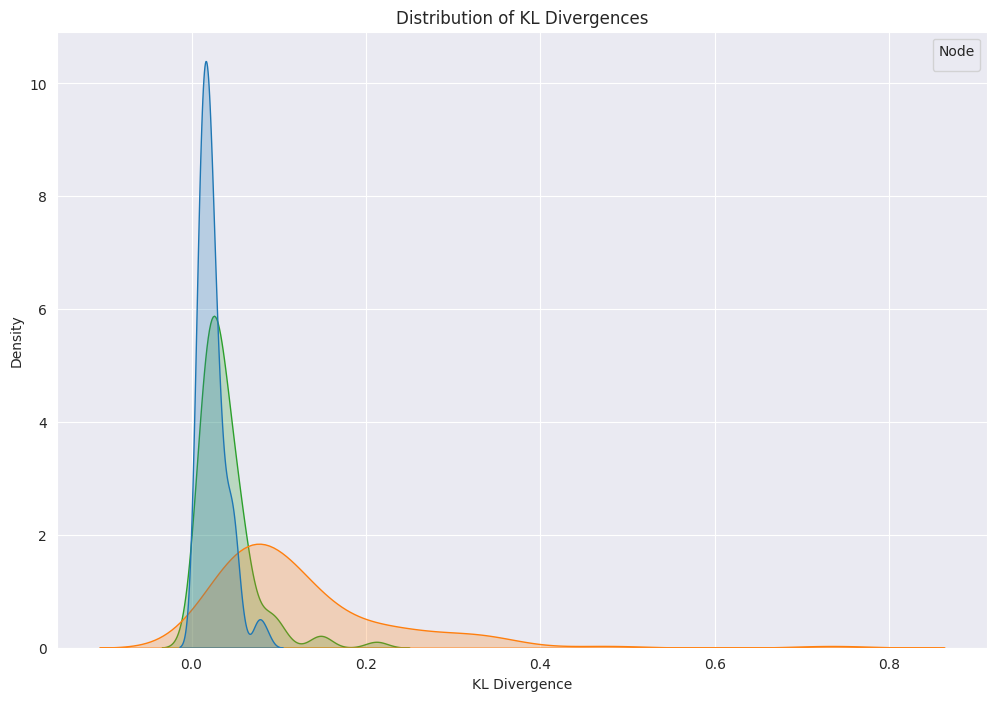

a:
  Mean: 0.0240
  Std Dev: 0.0158
  Min: 0.0053
  Max: 0.0857

c:
  Mean: 0.1264
  Std Dev: 0.1075
  Min: 0.0232
  Max: 0.7343

e:
  Mean: 0.0387
  Std Dev: 0.0315
  Min: 0.0036
  Max: 0.2120



In [76]:
# Analyze the results
import seaborn as sns
import pandas as pd

kl_divergences = {node: [result[node] for result in results] for node in results[0].keys()}

# Convert the data to a long format suitable for seaborn
df = pd.DataFrame([(node, div) for node, divs in kl_divergences.items() for div in divs],
                  columns=['Node', 'KL Divergence'])

# Plot the distribution of KL divergences for each node using KDE
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df, x='KL Divergence', hue='Node', shade=True)
plt.xlabel('KL Divergence')
plt.ylabel('Density')
plt.title('Distribution of KL Divergences')
plt.legend(title='Node')
plt.show()

# Print summary statistics
for node, divergences in kl_divergences.items():
    print(f"{node}:")
    print(f"  Mean: {np.mean(divergences):.4f}")
    print(f"  Std Dev: {np.std(divergences):.4f}")
    print(f"  Min: {np.min(divergences):.4f}")
    print(f"  Max: {np.max(divergences):.4f}")
    print()

AUC

In [77]:

def load_data_from_json(file_path):
    """
    Load data from a JSON file and return it as a dictionary.
    
    :param file_path: Path to the JSON file
    :return: Dictionary containing the loaded data
    """
    try:
        with open(file_path, 'r') as file:
            data = json.load(file)
        print(f"Data successfully loaded from {file_path}")
        return data
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return None
    except json.JSONDecodeError:
        print(f"Error: Invalid JSON format in {file_path}")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {str(e)}")
        return None



In [78]:

# Specify the path to your JSON file
json_file_path = 'data/sampled_data.json'

# Load the data
data_dict = load_data_from_json(json_file_path)

# Check if data was loaded successfully
if data_dict is not None:
    print("Data loaded successfully. You can now use data_dict in your analysis.")
else:
    print("Failed to load data. Please check the file path and format.")


Data successfully loaded from data/sampled_data.json
Data loaded successfully. You can now use data_dict in your analysis.


In [79]:
data_dict_resampled = load_data_from_json('data/resampled_data.json')

Data successfully loaded from data/resampled_data.json


In [80]:
def create_vector(data, sizes):
    vectors = []
    current_index = 0
    for i, size in enumerate(sizes):
        for j in range(size):
            vector = [
                #data[f'a{i}'],  # Unit node 'a' for the school
                data[f'_b{i}_{j}'],  # Subunit node 'b' for this specific child
                #data[f'c{i}'],  # Unit node 'c' for the school
                data[f'_d{i}_{j}'],  # Subunit node 'd' for this specific child
                #data[f'e{i}']   # Unit node 'e' for the school
            ]
            vectors.append(vector)
            current_index += 1
    return np.array(vectors)



In [81]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier



In [82]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

def hscm_classification_pipeline(X, y):
    # Train a Random Forest classifier
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    #clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf = KNeighborsClassifier(n_neighbors=10)
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Calculate and print accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plot feature importances
    #feature_names = [f"Feature_{i}" for i in range(X.shape[1])]
    #importances = clf.feature_importances_
    #indices = np.argsort(importances)[::-1]

    #plt.figure(figsize=(10, 6))
    #plt.title("Feature Importances")
    #plt.bar(range(len(feature_names)), importances[indices])
    #plt.xticks(range(len(feature_names)), [feature_names[i] for i in indices], rotation=90)
    #plt.tight_layout()
    #plt.show()

    return accuracy


In [83]:

original_vectors = create_vector(data_dict, sizes)
new_vectors = create_vector(data_dict_resampled, sizes)
X = np.vstack((original_vectors, new_vectors))
y = np.array([0]*len(original_vectors) + [1]*len(new_vectors))  # 0 for original, 1 for new


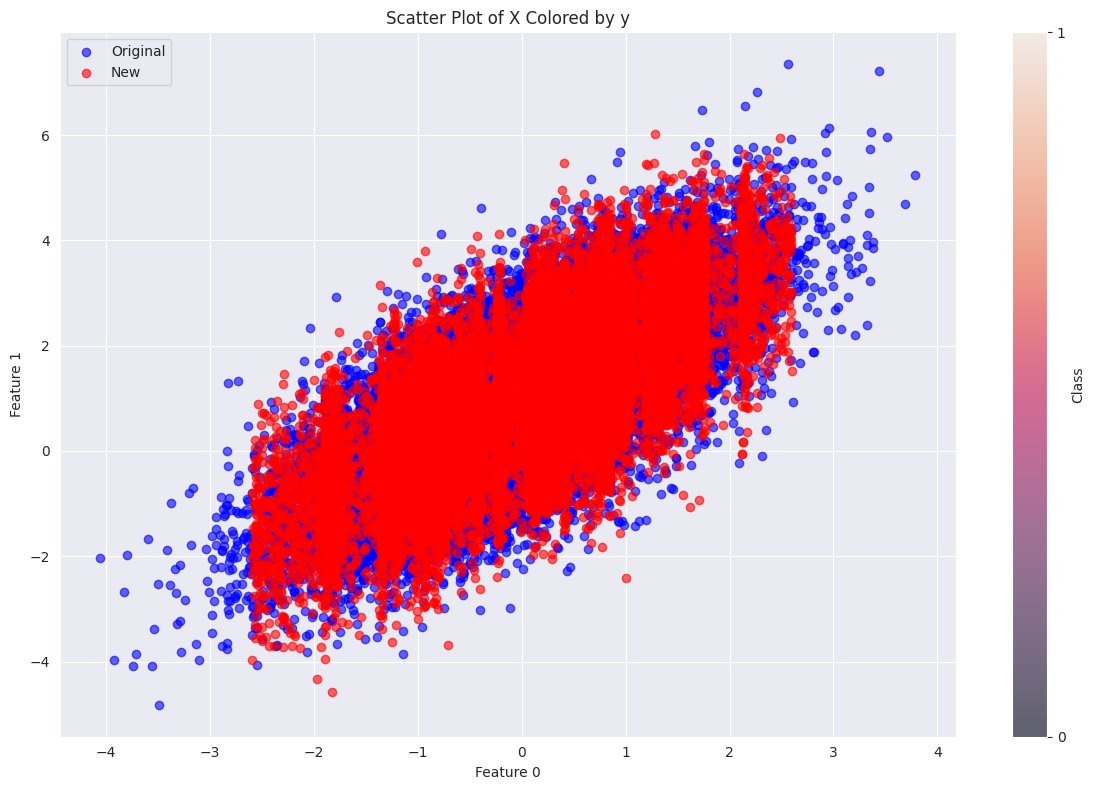

In [84]:
# Plotting X according to its color in y

# Create a scatter plot
plt.figure(figsize=(12, 8))

# Plot points for y=0 (original vectors)
plt.scatter(X[y==0, 0], X[y==0, 1], c='blue', label='Original', alpha=0.6)

# Plot points for y=1 (new vectors)
plt.scatter(X[y==1, 0], X[y==1, 1], c='red', label='New', alpha=0.6)

plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('Scatter Plot of X Colored by y')
plt.legend()

# Add a colorbar
plt.colorbar(ticks=[0, 1], label='Class')

plt.tight_layout()
plt.show()


In [85]:
hscm_classification_pipeline(X, y)

Accuracy: 0.59
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.63      0.61      4507
           1       0.60      0.55      0.57      4493

    accuracy                           0.59      9000
   macro avg       0.59      0.59      0.59      9000
weighted avg       0.59      0.59      0.59      9000



0.5911111111111111

In [86]:
def run_classification(k):
    list = []
    for i in range(k):
        data_dict = load_data_from_json(f'data/sampled_data_{i}.json')
        data_dict_resampled = load_data_from_json(f'data/resampled_data_{i}.json')        
        original_vectors = create_vector(data_dict, sizes)
        new_vectors = create_vector(data_dict_resampled, sizes)
        X = np.vstack((original_vectors, new_vectors))
        y = np.array([0]*len(original_vectors) + [1]*len(new_vectors))  # 0 for original, 1 for new
        accuracy_score = hscm_classification_pipeline(X, y)
        list.append(accuracy_score)
    return list

In [87]:
liste = run_classification(100)

Data successfully loaded from data/sampled_data_0.json
Data successfully loaded from data/resampled_data_0.json
Accuracy: 0.60
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.64      0.61      4507
           1       0.61      0.57      0.59      4493

    accuracy                           0.60      9000
   macro avg       0.60      0.60      0.60      9000
weighted avg       0.60      0.60      0.60      9000

Data successfully loaded from data/sampled_data_1.json
Data successfully loaded from data/resampled_data_1.json
Accuracy: 0.59
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.64      0.61      4507
           1       0.60      0.53      0.56      4493

    accuracy                           0.59      9000
   macro avg       0.59      0.59      0.59      9000
weighted avg       0.59      0.59      0.59      9000

Data successfully loaded from data/sampled_dat

In [88]:
print(liste)

[0.6008888888888889, 0.5872222222222222, 0.5715555555555556, 0.5575555555555556, 0.6044444444444445, 0.603, 0.5975555555555555, 0.5955555555555555, 0.5838888888888889, 0.5904444444444444, 0.5818888888888889, 0.5794444444444444, 0.5968888888888889, 0.5803333333333334, 0.5773333333333334, 0.5817777777777777, 0.5914444444444444, 0.5802222222222222, 0.5675555555555556, 0.5938888888888889, 0.585, 0.596, 0.5853333333333334, 0.5983333333333334, 0.5852222222222222, 0.5968888888888889, 0.5926666666666667, 0.5915555555555555, 0.5954444444444444, 0.5918888888888889, 0.5916666666666667, 0.5928888888888889, 0.583, 0.5876666666666667, 0.5834444444444444, 0.5681111111111111, 0.5934444444444444, 0.5938888888888889, 0.568, 0.5704444444444444, 0.5894444444444444, 0.5786666666666667, 0.582, 0.5827777777777777, 0.5687777777777778, 0.5873333333333334, 0.5856666666666667, 0.5726666666666667, 0.5877777777777777, 0.5748888888888889, 0.6017777777777777, 0.5905555555555555, 0.5712222222222222, 0.584666666666666

In [89]:
print(np.mean(np.array(liste)))

0.5882155555555556


In [90]:
print(np.std(np.array(liste)))

0.012015481988143775
